**1. Importing Data**

In [1]:
import pandas as pd
train_data = pd.read_csv("train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**2. Data Cleaning**

Removing null values

In [2]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
train_data=train_data.drop(['Cabin'], axis=1)
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [4]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [5]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**3. Analysing Data**

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Rate of Survival in Males and Females

In [7]:
women = train_data.loc[train_data['Sex']=="female", "Survived"]
men = train_data.loc[train_data['Sex']=='male', 'Survived']
rate_survival_women = sum(women)/len(women)*100
rate_survival_men = sum(men)/len(men)*100
print("Percentage of Men who survived: ",rate_survival_men, "%")
print("Percentage of Women who survived: ",rate_survival_women, "%")

Percentage of Men who survived:  18.890814558058924 %
Percentage of Women who survived:  74.20382165605095 %


**4. Data Visualisation**

0    549
1    342
Name: Survived, dtype: int64


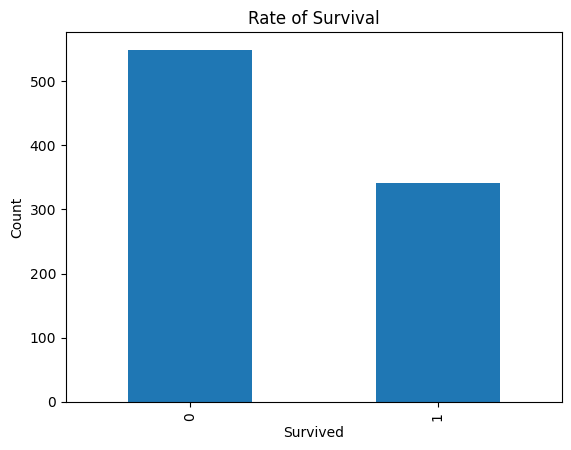

In [8]:
import matplotlib.pyplot as plt
survival_count = train_data['Survived'].value_counts()
print(survival_count)
survival_count.plot(kind='bar')
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Rate of Survival")
plt.show()

**Rate of Survival in Females**

<AxesSubplot:title={'center':'Rate of Survival in Females'}, ylabel='Survived'>

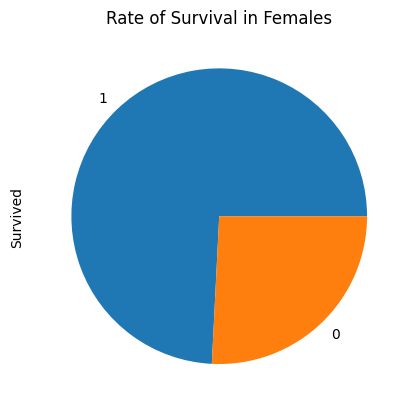

In [9]:
women.value_counts().plot(kind='pie', title='Rate of Survival in Females')

**Rate of Survival in Males**

<AxesSubplot:title={'center':'Rate of Survival in Males'}, ylabel='Survived'>

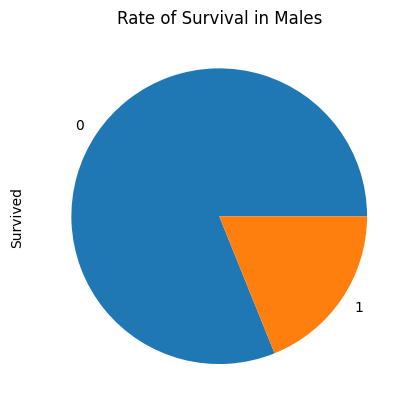

In [10]:
men.value_counts().plot(kind='pie', title='Rate of Survival in Males')

**Females VS Males**

Percentage of females in survived Passengers = 68.13%
Percentage of females in survived Passengers = 31.87%


<AxesSubplot:title={'center':'Ratio of Survived Males to Survived Females'}>

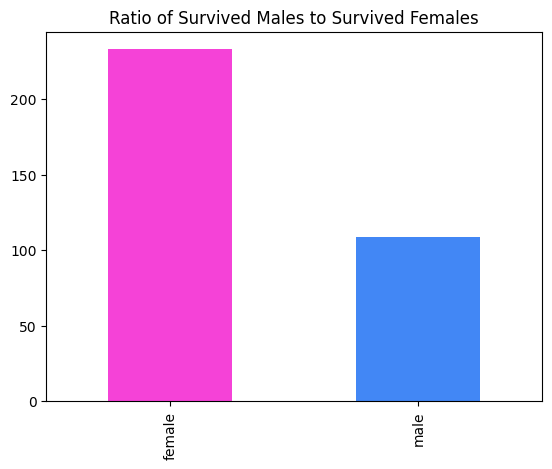

In [11]:
survived = train_data.loc[train_data['Survived']==1, 'Sex']
survival_sex_count = survived.value_counts()
colors = ['#f542d7', '#4287f5']
rate = survival_sex_count['female']/len(survived)*100
print(f"Percentage of females in survived Passengers = {rate:0.2f}%")
print(f"Percentage of females in survived Passengers = {(100-rate):0.2f}%")
survival_sex_count.plot(kind='bar', color=colors, title='Ratio of Survived Males to Survived Females')

**Rate of Survival in different Passenger Classes**

<AxesSubplot:title={'center':'Rate of Survival in different Passenger Classes'}>

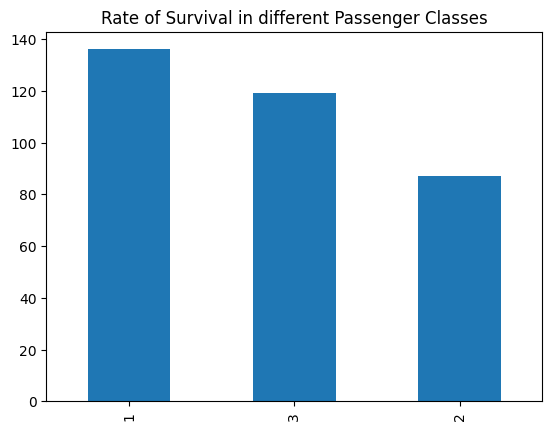

In [13]:
survived = train_data.loc[train_data['Survived']==1, 'Pclass']
survival_pclass_count = survived.value_counts()
survival_pclass_count.plot(kind='bar', title='Rate of Survival in different Passenger Classes')

**5. Encoding Categorical Variables**

In [ ]:
train_data['Sex'].value_counts()

Using Binary values for Sex Field

In [ ]:
train_data.replace({'Sex':{'male':0, 'female':1}}, inplace=True)
train_data.head()

Creating Categories for Embarked Field

In [ ]:
train_data['Embarked'].value_counts()

In [ ]:
len(train_data.columns)

In [ ]:
train_data.insert(11, 'C', [int(emb=='C')for emb in train_data['Embarked']])
train_data.head()

In [ ]:
train_data.insert(12, 'Q', [int(emb=='Q') for emb in train_data['Embarked']])
train_data.head()

In [ ]:
train_data = train_data.drop(['Embarked'], axis=1)
train_data.head()

**6. Preparing Data for Regression Model**

In [ ]:
input_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
input_data

In [ ]:
input_data.isnull().sum()

In [ ]:
output_data = train_data['Survived']
output_data

**7. Splitting Dataset for training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
in_train, in_test, out_train, out_test = train_test_split(input_data, output_data, random_state=10)

In [ ]:
in_train.shape

In [ ]:
in_test.shape

**8. Logistic Regression Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(in_train, out_train)

In [ ]:
model_out = log_reg_model.predict(in_test)

In [ ]:
model_out

**9. Checking Accuracy of the Model**

In [ ]:
from sklearn.metrics import accuracy_score
model_score = accuracy_score(model_out, out_test)
print(f"Model Score = {(model_score*100):0.2f}%")

**10. Deploying Model**

In [ ]:
import pickle as pkl
pkl.dump(log_reg_model, open('Logistic_Regression_model.pkl', 'wb'))

In [ ]:
test = list(in_test.iloc[0])

In [ ]:
test

In [ ]:
import numpy as np
test = np.array(test)

In [ ]:
test

In [ ]:
log_reg_model.predict(test.reshape(-1, 8))